# 活性化関数のグラフの形状

以下は `Section 02: Basic Knowledge of Deep Learning` の `Lecture 05: About Deep Learning (2)` にて紹介した活性化関数を python で実装し、可視化した結果です。

## 可視化の準備

活性化関数の実装には `numpy` を使用し、可視化には `matplotlib` を使用します。

以下の関数 `visualize` は入力 $x$ と $y$ を受け取ってその値をグラフへ描画します。
コメントアウトされている部分はグラフ描画時に使用するフォントやフォントサイズを指定可能です。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 40

def visualize(x: np.ndarray, y: np.ndarray, bottom: float, top :float) -> None:
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_xlim(-10, 10)
    ax.set_ylim(bottom, top)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.plot(x, y, linewidth=1)

## 活性化関数のグラフの可視化

今回は $x$ 軸において $-10$ から $10$ の範囲で可視化してみましょう。まずは [numpy の `arange` 関数](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) を使用して $0.01$ 刻みで $-10$ から $10$ までの値が入ったリストを作成します。

In [ ]:
x = np.arange(-10, 10, 0.01)
x

array([-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99])

### シグモイド関数 - sigmoid function

シグモイド関数はニューラルネットワークを始め広く深層学習で使用されている活性化関数です。

シグモイド関数は次の式で定義されます:

$$
    y = \mathrm{sigmoid}(x) = \frac{1}{1 + \exp{(-x)}}
$$

この関数は入力値を 0 から 1 の範囲の値へ変換し、入力がベクトルである場合は、各次元の値に対して適用されます。よって入力と出力の次元数は同じです。

sigmoid 関数は幅広く用いられている一方で、次のような欠点があげられます:
- 勾配消失問題
- 出力が 0 を中心としたもの (zero-centered) ではないため、最適化が難しくなる傾向あり
- 損失の収束が比較的遅い傾向にあり

以下に python による実装とその可視化を示します。

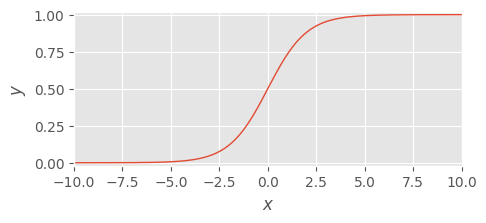

In [ ]:
def sigmoid_function(x):
    return 1. / (1. + np.exp(-x))

y = sigmoid_function(x)
visualize(x, y, bottom=-0.02, top=1.02)

## 双曲線正接関数 - hyperbolic tangent

双曲線正接関数は tanh 関数として知られています。
tanh 関数は次の式で定義されます:

$$
    y = \mathrm{tanh}(x) = \frac{\exp{(x)} - \exp{(-x)}}{\exp{(x)} + \exp{(-x)}}
$$

この関数は入力を -1 から 1 の範囲の値へ変換します。この変換は 0 を中心としたもの (zero-centered) なため、深層学習モデルの損失の最適化が容易になる傾向があり、sigmoid 関数よりもよい結果をもたらす場合が多いです。ただし sigmoid 関数と同様に勾配消失の問題は依然として存在します。

以下に python による実装とその可視化を示します。

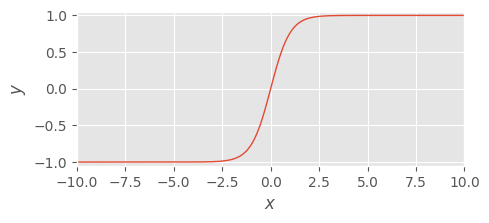

In [ ]:
def tanh_function(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

y = tanh_function(x)
visualize(x, y,  bottom=-1.05, top=1.05)

### 正規化線形関数 - rectified linear unit, ReLU

正規化線形関数は ReLU 関数とよく呼ばれており、深層学習の発展に大きく寄与した活性化関数です。

ReLU 関数は次の式で定義されます:

$$
    y = \mathrm{ReLU}(x) = \max{(0, x)}
$$

この関数は入力が 0 以下であれば 0 を出力し、0 より大きければそのままの値を出力します。このような定式化のため、sigmoid 関数や tanh 関数で問題であった勾配消失が改善されます。従って今日ほとんどの深層学習モデルで採用されています。

以下に python による実装とその可視化を示します。


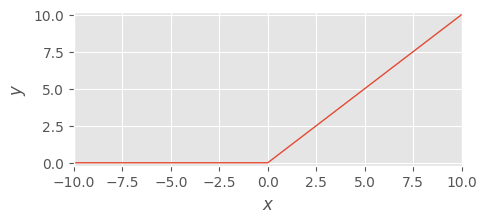

In [ ]:
def relu_function(x):
    return np.maximum(0, x)

y = relu_function(x)
visualize(x, y, bottom=-0.2, top=10.2)

## 参考

- Activation functions and it’s types-Which is better? by Anish Singh Walia https://link.medium.com/2ppKTSehzCb